In [1]:
# https://pykeen.readthedocs.io/en/latest/tutorial/first_steps.html
# https://github.com/pykeen/pykeen/blob/master/notebooks/hello_world/hello_world.ipynb

# # Change output directory
import os
os.chdir('C:/Users/CynYDie/Desktop/Austral_2/TESIS/KG/DRKG/pykeen')
os. getcwd()

# import pandas as pd

# Start by training model on give dataset
########################################################

# Import dataset

from pykeen.datasets import Nations

dataset = Nations()
dataset.summarize()

Nations (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    14          55                1592
Testing     14          55                 201
Validation  14          55                 199
Total       -           -                 1992
Head    Relation            tail
------  ------------------  ------
brazil  blockpositionindex  china
brazil  blockpositionindex  cuba
brazil  blockpositionindex  poland
brazil  blockpositionindex  ussr
brazil  booktranslations    uk



In [2]:
# Train and evaluate the pykeen.models.TransE model on the pykeen.datasets.Nations dataset

from pykeen.pipeline import pipeline

pipeline_result = pipeline(
    dataset="Nations",
    model="TransE",
    # Training configuration
    training_kwargs=dict(
        num_epochs=20,
        use_tqdm_batch=False,
    ),
    # Runtime configuration
    random_seed=1234,
    device="cpu",
)


C:\Users\CynYDie\Anaconda3\envs\ml\lib\site-packages\pykeen\nn\representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")


Training epochs on cpu:   0%|          | 0/20 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds


In [3]:
# How to look at the model
model = pipeline_result.model
model

TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 50)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 50)
  )
)

In [4]:
# How to look at the triples
tf = pipeline_result.training
tf

TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\CynYDie\Anaconda3\envs\ml\Lib\site-packages\pykeen\datasets\nations\train.txt")

In [5]:
tf.num_entities, tf.num_relations, tf.num_triples

(14, 55, 1592)

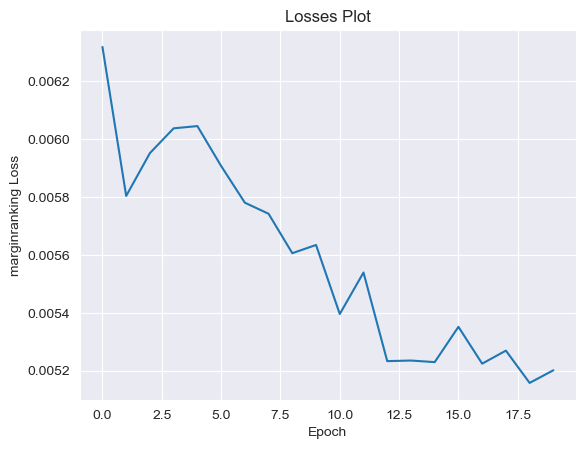

In [6]:
# Evaluate results
########################################################
import matplotlib.pyplot as plt
import torch

pipeline_result.plot_losses()
plt.show()

In [7]:
pipeline_result.metric_results.to_df()

,Side,Type,Metric,Value
0,head,optimistic,adjusted_arithmetic_mean_rank_index,-0.107487
1,tail,optimistic,adjusted_arithmetic_mean_rank_index,0.015895
2,both,optimistic,adjusted_arithmetic_mean_rank_index,-0.043634
3,head,realistic,adjusted_arithmetic_mean_rank_index,-0.107487
4,tail,realistic,adjusted_arithmetic_mean_rank_index,0.015895
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,-0.210305
221,both,realistic,adjusted_hits_at_k,0.062537
222,head,pessimistic,adjusted_hits_at_k,0.339191
223,tail,pessimistic,adjusted_hits_at_k,-0.210305


In [8]:
# Wordclouds
tf.entity_word_cloud()

C:\Users\CynYDie\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
tf.relation_word_cloud()

In [10]:
# While PyKEEN internally maps entities and relations to contiguous identifiers, 
# it’s still useful to be able to interact with datasets, triples factories, 
# and models using the labels of the entities and relations

# Get tensor of entity identifiers
entity_ids = torch.as_tensor(tf.entities_to_ids(["china", "egypt", "india"]))
entity_ids

tensor([2, 4, 5])

In [13]:
# While PyKEEN internally maps entities and relations to contiguous identifiers, 
# it’s still useful to be able to interact with datasets, triples factories, 
# and models using the labels of the entities and relations

# Get tensor of entity identifiers
entity_ids = torch.as_tensor(tf.entities_to_ids(["china", "egypt", "india"]))
entity_ids

# The entity representations and relation representations can be accessed like this:

# Read the files of the dataset
import csv

entities_file = open("./Nations/nations_transe/training_triples/entity_to_id.tsv")
entities = csv.reader(entities_file, delimiter="\t")

for row in entities:
    print(row)


['id', 'label']
['0', 'brazil']
['1', 'burma']
['2', 'china']
['3', 'cuba']
['4', 'egypt']
['5', 'india']
['6', 'indonesia']
['7', 'israel']
['8', 'jordan']
['9', 'netherlands']
['10', 'poland']
['11', 'uk']
['12', 'usa']
['13', 'ussr']


In [14]:
triplets_file = open("./Nations/nations_transe/training_triples/numeric_triples.tsv")
triplets = csv.reader(triplets_file, delimiter="\t")

for row in triplets:
    print(row)

['head', 'relation', 'tail']
['0', '3', '2']
['0', '3', '3']
['0', '3', '10']
['0', '3', '13']
['0', '4', '11']
['0', '4', '12']
['0', '6', '2']
['0', '6', '3']
['0', '6', '10']
['0', '6', '13']
['0', '7', '1']
['0', '7', '4']
['0', '7', '7']
['0', '7', '8']
['0', '8', '9']
['0', '8', '11']
['0', '8', '12']
['0', '9', '3']
['0', '9', '5']
['0', '9', '12']
['0', '9', '13']
['0', '13', '12']
['0', '14', '4']
['0', '14', '5']
['0', '14', '9']
['0', '14', '10']
['0', '14', '12']
['0', '14', '13']
['0', '15', '12']
['0', '18', '9']
['0', '18', '11']
['0', '19', '2']
['0', '19', '3']
['0', '19', '4']
['0', '19', '9']
['0', '19', '11']
['0', '19', '12']
['0', '19', '13']
['0', '20', '4']
['0', '20', '5']
['0', '20', '6']
['0', '20', '7']
['0', '20', '9']
['0', '20', '11']
['0', '20', '12']
['0', '21', '3']
['0', '21', '5']
['0', '21', '9']
['0', '21', '11']
['0', '24', '12']
['0', '25', '2']
['0', '27', '3']
['0', '27', '4']
['0', '27', '5']
['0', '27', '9']
['0', '27', '10']
['0', '27', '11'

In [15]:
relation_to_id_file = open("./Nations/nations_transe/training_triples/relation_to_id.tsv")
relation_to_id = csv.reader(relation_to_id_file, delimiter="\t")

for row in relation_to_id:
    print(row)

['id', 'label']
['0', 'accusation']
['1', 'aidenemy']
['2', 'attackembassy']
['3', 'blockpositionindex']
['4', 'booktranslations']
['5', 'boycottembargo']
['6', 'commonbloc0']
['7', 'commonbloc1']
['8', 'commonbloc2']
['9', 'conferences']
['10', 'dependent']
['11', 'duration']
['12', 'economicaid']
['13', 'eemigrants']
['14', 'embassy']
['15', 'emigrants3']
['16', 'expeldiplomats']
['17', 'exportbooks']
['18', 'exports3']
['19', 'independence']
['20', 'intergovorgs']
['21', 'intergovorgs3']
['22', 'lostterritory']
['23', 'militaryactions']
['24', 'militaryalliance']
['25', 'negativebehavior']
['26', 'negativecomm']
['27', 'ngo']
['28', 'ngoorgs3']
['29', 'nonviolentbehavior']
['30', 'officialvisits']
['31', 'pprotests']
['32', 'relbooktranslations']
['33', 'reldiplomacy']
['34', 'releconomicaid']
['35', 'relemigrants']
['36', 'relexportbooks']
['37', 'relexports']
['38', 'relintergovorgs']
['39', 'relngo']
['40', 'relstudents']
['41', 'reltourism']
['42', 'reltreaties']
['43', 'severdi

In [16]:
# Predict
########################################################

testing_mapped_triples = Nations().testing.mapped_triples.to(model.device)
# Who do we predict brazil participates in inter-governmental organizations with?
model.get_tail_prediction_df("brazil", "intergovorgs", triples_factory=tf, testing=testing_mapped_triples)


,tail_id,tail_label,score,in_training,in_testing
0,0,brazil,-6.337400,False,False
10,10,poland,-8.252392,False,True
11,11,uk,-8.998250,True,False
13,13,ussr,-9.048882,False,False
5,5,india,-9.409709,True,False
12,12,usa,-9.421271,True,False
9,9,netherlands,-9.451627,True,False
7,7,israel,-9.462447,True,False
3,3,cuba,-9.538419,False,True
4,4,egypt,-9.848766,True,False


In [20]:
# Loading a pre-trained Model
########################################################

import torch

my_pykeen_model = torch.load('./Nations/nations_transe/trained_model.pkl')

# While PyKEEN internally maps entities and relations to contiguous identifiers, 
# it’s still useful to be able to interact with datasets, triples factories, 
# and models using the labels of the entities and relations

triples_factory = Nations().training
triples_factory

TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\CynYDie\Anaconda3\envs\ml\Lib\site-packages\pykeen\datasets\nations\train.txt")

In [18]:
# Get tensor of entity identifiers
entity_ids = torch.as_tensor(triples_factory.entities_to_ids(["china", "egypt"]))

entity_ids

tensor([2, 4])